In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
import random
import skimage
import pandas as pd
from sklearn.metrics import classification_report
import imutils
from sklearn.metrics import confusion_matrix
import seaborn as sns
from  sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_traintemp, y_traintemp), (X_testtemp, y_testtemp)= (X_train, y_train), (X_test, y_test)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# def baseline_model():
#     model = Sequential()
#     model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
#     model.add(MaxPooling2D())
#     model.add(Dropout(0.2))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(num_classes, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model
# model = baseline_model()
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200 , verbose=1)
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
 12/300 [>.............................] - ETA: 23s - loss: 1.4308 - accuracy: 0.6263

KeyboardInterrupt: ignored

In [ ]:
history.history.keys()

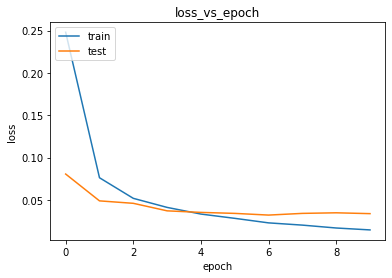

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss_vs_epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model.save('/content/gdrive/MyDrive/My_cv/model.h5')

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/My_cv/model.h5')

In [ ]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

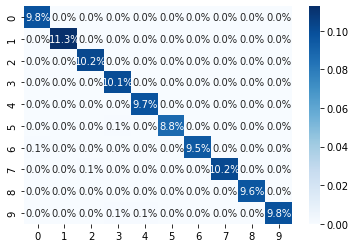

In [ ]:
a = confusion_matrix(y_testtemp , np.argmax(model.predict(X_test),axis = 1))
sns.heatmap(a/np.sum(a), annot=True, 
            fmt='.1%', cmap='Blues')

4
3


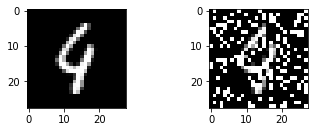

In [ ]:
#s&p = 0.08
n = 115
image = X_testtemp[n]
blurred_image = sp_noise(image , 0.2 )

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image , cmap = 'gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(blurred_image , cmap = 'gray')


image = image.reshape((1,28,28,1))
image = image.astype('float32')
image = image/255

blurred_image = blurred_image.reshape((1,28,28,1))
blurred_image = blurred_image.astype('float32')
blurred_image = blurred_image/255

print(np.argmax(model.predict(image)))
print(np.argmax(model.predict(blurred_image)))

In [ ]:
blurred_collection = np.zeros(X_test.shape)
for i in range(X_testtemp.shape[0]):
    image = X_testtemp[i]
    blurred_image = sp_noise(image , 0.20)

    # image = image.reshape((1,28,28,1))
    # image = image.astype('float32')
    # image = image/255

    blurred_image = blurred_image.reshape((28,28,1))
    blurred_image = blurred_image.astype('float32')
    blurred_image = blurred_image/255

    # normal_pred.append(np.argmax(model.predict(image)))  
    blurred_collection[i] = blurred_image

blurred_pred = np.argmax(model.predict(blurred_collection) , axis = 1)
print(precision_recall_fscore_support(y_testtemp , blurred_pred , average = 'weighted'))
print(accuracy_score(y_testtemp , blurred_pred))

(0.6814376937844508, 0.379, 0.33108933276820246, None)
0.379


In [ ]:
n = 105
image = X_testtemp[n]
image = imutils.rotate(image, angle = 0)
blurred_image =  image

cv2_imshow(image)
cv2_imshow(blurred_image)


image = image.reshape((1,28,28,1))
image = image.astype('float32')
image = image/255

blurred_image = blurred_image.reshape((1,28,28,1))
blurred_image = blurred_image.astype('float32')
blurred_image = blurred_image/255

print(np.argmax(model.predict(image)))
print(np.argmax(model.predict(blurred_image)))

9
9


In [ ]:
blurred_collection = np.zeros(X_test.shape)
for i in range(X_testtemp.shape[0]):
    image = X_testtemp[i]
    image = imutils.rotate(image, angle = 5 )
    blurred_image = sp_noise(image , 0.1)
    # image = image.reshape((1,28,28,1))
    # image = image.astype('float32')
    # image = image/255

    blurred_image = blurred_image.reshape((28,28,1))
    blurred_image = blurred_image.astype('float32')
    blurred_image = blurred_image/255

    # normal_pred.append(np.argmax(model.predict(image)))  
    blurred_collection[i] = blurred_image

blurred_pred = np.argmax(model.predict(blurred_collection) , axis = 1)
print(precision_recall_fscore_support(y_testtemp , blurred_pred , average = 'weighted'))
print(accuracy_score(y_testtemp , blurred_pred))

(0.7927990993532291, 0.6937, 0.6709064904295925, None)
0.6937


8


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       980
           1       0.99      0.15      0.26      1135
           2       0.46      0.88      0.60      1032
           3       0.43 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
from keras.utils.vis_utils import plot_model

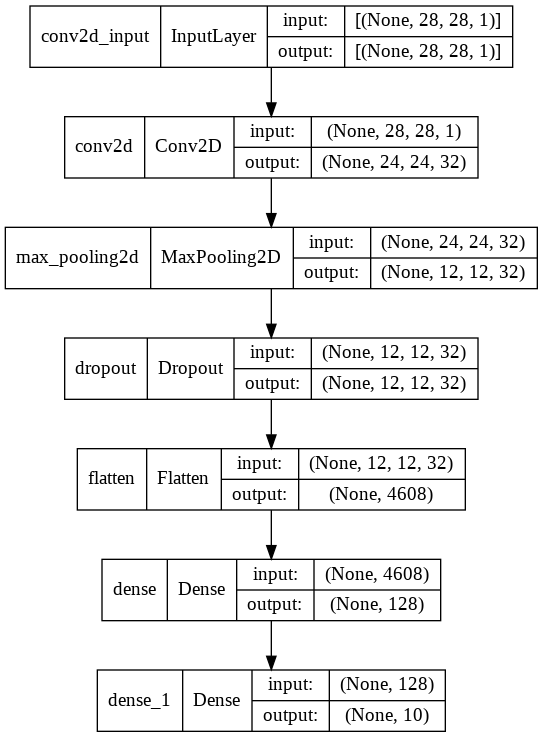

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True)